In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions
from keras.models import Sequential, Model
import re

Using TensorFlow backend.


# Data Preprocessing (Images)

In [254]:
path = "Dataset/Images/"
img = os.listdir(path)

In [255]:
model = ResNet50(weights = "imagenet",input_shape = (224,224,3))

In [10]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [256]:
model_new = Model(model.input,model.layers[-2].output)

In [16]:
model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [257]:
def preprocess_image(img):
    img = image.load_img(img, target_size=(224,224))
    img = image.img_to_array(img)
    img = img.reshape((1,224,224,3))
    img = preprocess_input(img)
    
    return img

In [258]:
i = preprocess_image(path + img[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


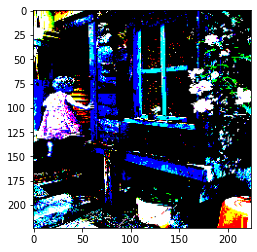

In [259]:
plt.imshow(i.reshape((224,224,3)))

In [260]:
def encoding_image(img):
    img = preprocess_image(img)
    features_of_image = model_new.predict(img)
    features_of_image = features_of_image.reshape(features_of_image.shape[1],)
    
    return features_of_image

In [261]:
i = encoding_image(path + img[0])

In [262]:
import time

In [194]:
f_train = open("E:\Data Science\Projects Data Science\Image Captioning\Dataset\Flickr_TextData\Flickr_8k.trainImages.txt")
training_files = f_train.read()
f_train.close()

f_validation = open("E:\Data Science\Projects Data Science\Image Captioning\Dataset\Flickr_TextData\Flickr_8k.devImages.txt")
validation_files = f_validation.read()
f_validation.close()

f_test = open("E:\Data Science\Projects Data Science\Image Captioning\Dataset\Flickr_TextData\Flickr_8k.testImages.txt")
testing_files = f_test.read()
f_test.close()

In [195]:
training_files = [file_name[:-4] for file_name in training_files.split("\n")]


In [196]:
validation_files = [file_name[:-4] for file_name in validation_files.split("\n")]


In [197]:
testing_files = [file_name[:-4] for file_name in testing_files.split("\n")]

In [198]:
len(training_files)

6000

In [199]:
len(validation_files)

1000

In [200]:
len(testing_files)

1000

In [112]:
for q,m in enumerate(training_files):
    print(q,m)

0 2513260012_03d33305cf
1 2903617548_d3e38d7f88
2 3338291921_fe7ae0c8f8
3 488416045_1c6d903fe0
4 2644326817_8f45080b87
5 218342358_1755a9cce1
6 2501968935_02f2cd8079
7 2699342860_5288e203ea
8 2638369467_8fc251595b
9 2926786902_815a99a154
10 2851304910_b5721199bc
11 3423802527_94bd2b23b0
12 3356369156_074750c6cc
13 2294598473_40637b5c04
14 1191338263_a4fa073154
15 2380765956_6313d8cae3
16 3197891333_b1b0fd1702
17 3119887967_271a097464
18 2276499757_b44dc6f8ce
19 2506892928_7e79bec613
20 2187222896_c206d63396
21 2826769554_85c90864c9
22 3097196395_ec06075389
23 3603116579_4a28a932e2
24 3339263085_6db9fd0981
25 2532262109_87429a2cae
26 2076906555_c20dc082db
27 2502007071_82a8c639cf
28 3113769557_9edbb8275c
29 3325974730_3ee192e4ff
30 1655781989_b15ab4cbff
31 1662261486_db967930de
32 2410562803_56ec09f41c
33 2469498117_b4543e1460
34 69710415_5c2bfb1058
35 3414734842_beb543f400
36 3006217970_90b42e6b27
37 2192411521_9c7e488c5e
38 3535879138_9281dc83d5
39 2685788323_ceab14534a
40 3465606652_

570 2298283771_fb21a4217e
571 2282600972_c22d1e03c7
572 418796494_bdb441de42
573 365274901_576b0f8241
574 733964952_69f011a6c4
575 3374759363_d6f7a0df41
576 296873864_4de75de261
577 2860372882_e0ef4131d4
578 3517362674_0f5296de19
579 2206594874_5e0087c6b7
580 3084010872_cbc3ea8239
581 2798880731_4f51634374
582 512634877_d7ad8c8329
583 3619630328_2d0865b6f4
584 3105315670_5f86f73753
585 1087168168_70280d024a
586 3143953179_1c08c023a5
587 3050114829_18bc5a6d7c
588 3529721084_4b405baf54
589 3409740108_1505489537
590 445148321_9f2f3ac711
591 1904112245_549e47c8aa
592 3527682660_c5e9fa644a
593 2404488732_ca1bbdacc2
594 1277185009_06478dd457
595 2886533440_dfa832f2fa
596 3402081035_a54cfab1d9
597 314904143_5a216a192b
598 3183195185_cd0ff994a1
599 2315867011_fc5fc9fa6d
600 2209888959_d636b1be0b
601 3413669228_ec64efeb34
602 2932498509_27cb0038ec
603 2949353587_64c54e9589
604 3304030264_da3dd18c7b
605 2215165918_2bf5b659dd
606 933118213_b35b0b62a7
607 2952320230_26601173be
608 1289142574_2bd6a

1065 2564888404_b57f89d3c7
1066 2414390475_28a0107bb0
1067 3275627207_0b41e44597
1068 2199200615_85e4c2a602
1069 248858242_1c33c54ada
1070 3476381830_3751dd9339
1071 2394763838_99d1435b85
1072 2075493556_b763648389
1073 2284894733_b710b9b106
1074 2873445888_8764699246
1075 3139393607_f0a54ca46d
1076 3563924606_5914392cd8
1077 1000268201_693b08cb0e
1078 3439128755_84409b8823
1079 3584829998_25e59fdef3
1080 2017276266_566656c59d
1081 3497238310_2abde3965d
1082 2277299634_e14bdb7ff7
1083 2541901399_0a57f4cc76
1084 3338217927_3c5cf3f7c6
1085 529198549_5cd9fedf3f
1086 3559781965_d4ec00e506
1087 3285298241_9b1ed98d19
1088 375384566_254c2362d4
1089 1917203130_fcaff8b10e
1090 2949762776_52ece64d28
1091 2205088706_d7e633e00d
1092 3435653630_3b6cca2c40
1093 3497069793_2d4baf5b4b
1094 3245939062_8ffe1d2be5
1095 2318502106_33f2e4b4fc
1096 3677927146_1696f0b075
1097 2328106090_b7c2725501
1098 3670918456_68631d362a
1099 1461653394_8ab96aae63
1100 436393371_822ee70952
1101 2601612082_4b9be27426
1102 

1564 2000459828_3c9e109106
1565 437527058_189f2a7eef
1566 3420323191_d66e003264
1567 190638179_be9da86589
1568 240583223_e26e17ee96
1569 3693297007_94512e861e
1570 449352117_63c359c6e7
1571 835415474_7b7f2a9768
1572 3562001359_65c63aeda3
1573 3582920844_2742804f3d
1574 3285180819_a9712fd2bc
1575 2921198890_6f70dfbf4c
1576 2110692070_8aaaa1ae39
1577 264859622_f3a00ab409
1578 2873522522_829ea62491
1579 2148695079_9ae6a9b1c7
1580 3030793171_55cd646eed
1581 2511762757_bd0ab0a017
1582 364213568_7f83e7d144
1583 2206600240_f65df56a09
1584 918886676_3323fb2a01
1585 944374205_fd3e69bfca
1586 3572346664_e1e6c77f11
1587 2107837987_ffecfc367a
1588 2902661518_1513be3ea6
1589 3503011427_a4ee547c77
1590 2557507575_b247f145bc
1591 326334188_8850b7bfd4
1592 239807547_4923efc821
1593 3497234632_6ec740fc1e
1594 3334057289_68ece38a85
1595 3299418821_21531b5b3c
1596 270864951_1737ae5479
1597 1244140539_da4804d828
1598 822836318_21544f0f78
1599 2423085253_6c19149855
1600 2364394224_c17b09e035
1601 209742050

2064 2489602993_896c1ea40a
2065 710878348_323082babd
2066 2101128963_fdf8b2a0d7
2067 2098646162_e3b3bbf14c
2068 246041128_bedb09ed74
2069 1430154945_71bbaa094a
2070 3169276423_6918dd4da1
2071 543940240_a54a3c7989
2072 3131107810_7e9b96cddc
2073 3130064588_6d1d3fa2dd
2074 1016887272_03199f49c4
2075 811663364_4b350a62ce
2076 3211581957_df2f7e2236
2077 1303727828_d1052ee341
2078 3467843559_a457ce37b6
2079 566794036_60f7acdf35
2080 2773011586_6f4cd41e84
2081 3613005134_bb7f304da1
2082 2246717855_c0c08fe5d2
2083 2980348138_91cc6f6d0f
2084 3171035252_dba286ae5c
2085 3443326696_fe0549c5be
2086 2964438493_413667c04a
2087 1255504166_f2437febcb
2088 1303727066_23d0f6ed43
2089 3026102616_3cf350af9e
2090 2554570943_122da6438f
2091 3132619510_7dfc947d25
2092 542648687_adf13c406b
2093 1542033433_5453d4c466
2094 3506607642_40037b3fbf
2095 3136674757_57406c305c
2096 2043520315_4a2c782c90
2097 3312096605_f458757418
2098 3411595210_8e0893b266
2099 1439046601_cf110a75a7
2100 3069937639_364fc11e99
2101 29

2564 1417295167_5299df6db8
2565 1204996216_71d7519d9a
2566 3294717824_3bb7b5d1c8
2567 3549614763_42f34f3d1e
2568 2824922268_3fafb64683
2569 2116316160_d5fa7abdc3
2570 3497502407_ec566442c9
2571 3106562372_e349a27764
2572 146100443_906d87faa2
2573 2391269207_d1d2615b1d
2574 3198231851_6b1727482b
2575 1572286502_64e5c4b920
2576 565605894_8f0bed0438
2577 3557148230_7fc843e5de
2578 2925577165_b83d31a7f6
2579 109260216_85b0be5378
2580 2402462857_7684848704
2581 3339747039_1a8455c210
2582 3627076769_3b71e73018
2583 2987195421_e830c59fb6
2584 1304961697_76b86b0c18
2585 2176147758_9a8deba576
2586 2842849030_89548af61c
2587 2521213787_ca9b5a1758
2588 3587449716_3bf1552c36
2589 3652859271_908ae0ae89
2590 3578068665_87bdacef6a
2591 2867845624_22e4fe0a23
2592 3057770908_3fd97f79f9
2593 2268729848_d418451226
2594 3367851138_757d6bd2ef
2595 3478176372_7c510a0cef
2596 3708748633_e7e3cf4e84
2597 766346887_a9a9d0637a
2598 2681215810_00b0642f7b
2599 2218743570_9d6614c51c
2600 2607130765_97833d6ce1
2601 

3064 495033548_bd320405d8
3065 3634281981_d9cf1d1a33
3066 3258472448_75cfab5e6f
3067 2696060728_3043cfc38c
3068 238512430_30dc12b683
3069 753285176_f21a2b984d
3070 3405759441_fb31c80240
3071 241346352_c5a0ea43c6
3072 3678098428_40c1b74cc2
3073 1273001772_1585562051
3074 2130986011_47cb05c8c9
3075 3242808166_8638150274
3076 406901451_7eafd7568a
3077 452416075_60b2bb5832
3078 514222285_aa0c8d05b7
3079 3225998968_ef786d86e0
3080 3521201948_9049197f20
3081 2715155329_1ed1756000
3082 337793983_ac5b2e848e
3083 2303356248_65dd6aba6f
3084 3721799573_2f470950e0
3085 2466495935_623b144183
3086 297169473_d3974e0275
3087 1251558317_4ef844b775
3088 3017373346_3a34c3fe9d
3089 2890731828_8a7032503a
3090 2935986346_29df6cf692
3091 2063277300_f7ff476914
3092 3572942419_16ebdc3d46
3093 3234375022_1464ea7f8a
3094 2670560883_7e7b563092
3095 272156850_c4445a53f4
3096 1095590286_c654f7e5a9
3097 2393971707_bce01ae754
3098 3023178539_836b50cd43
3099 2381102729_12fc4d4c76
3100 3002920707_5d2e6e6aac
3101 330174

3563 190965502_0b9ed331d9
3564 2426724282_237bca30b5
3565 1540631615_8b42c1b160
3566 2138487671_5b89104043
3567 2088460083_42ee8a595a
3568 278002800_3817135105
3569 3591457224_88281dd04f
3570 3335997221_254366c400
3571 3258396041_69717247f7
3572 2930622766_fa8f84deb1
3573 3397310901_cbef5c06ef
3574 1713248099_d860df4e10
3575 3590557969_d0270d518b
3576 2623560640_0445c9a138
3577 3676432043_0ca418b861
3578 2866529477_7e0c053ebc
3579 2088532947_c628e44c4a
3580 3529211822_1dabdb3a9c
3581 2911245290_b2c79f328a
3582 3247168324_c45eaf734d
3583 3427614912_b147d083b2
3584 1286408831_05282582ed
3585 3532593368_be10432e92
3586 3738685861_8dfff28760
3587 3534183988_3763593dfb
3588 2130203183_49bae96b96
3589 3307147971_5b3abf61f9
3590 1105959054_9c3a738096
3591 2389107995_ec756f3514
3592 264928854_d9e61f3a8e
3593 2842609837_b3a0b383f7
3594 2206403470_8c25aa3cf8
3595 1002674143_1b742ab4b8
3596 3211316116_a2462e327d
3597 261737543_b8fdc24671
3598 2452334314_a7c443a787
3599 447733067_09cfac3286
3600 3

3974 2427490900_5b7a8874b9
3975 491564019_1ca68d16c1
3976 3660361818_e05367693f
3977 2892989340_bb7e0e5548
3978 2109911919_af45b93ef3
3979 269898095_d00ac7d7a4
3980 3341489212_a879e1544a
3981 3162289423_4ca8915d0c
3982 488089932_c3a5fa4140
3983 2133650765_fc6e5f295e
3984 3528105511_12ff45dc9c
3985 3544669026_1b5c0e6316
3986 609681901_66809d2dc1
3987 3207775692_bb897d9afd
3988 575636303_b0b8fd4eee
3989 3643684616_9d2be87a5a
3990 2769731772_18c44c18e2
3991 3399843227_3b9d2a8dbf
3992 3506869953_802f463178
3993 2089555297_95cf001fa7
3994 2896668718_0c3cff910f
3995 3501083764_cf592292a6
3996 3081330705_7a1732e12c
3997 2959500257_3621429a37
3998 2095078658_c14ba89bc2
3999 3443161359_65544fd732
4000 2698614194_b4e6e11dff
4001 271770120_880e8d8e52
4002 312156254_ef31dca5ed
4003 2853205396_4fbe8d7a73
4004 2808098783_c56b44befa
4005 241346260_f50d57b517
4006 3173014908_b3e69594b6
4007 1860543210_47e94cf652
4008 1359101233_16c2c150e3
4009 2698119128_62b4741043
4010 2853407781_c9fea8eef4
4011 3028

4423 2891961886_b7a2f0b0fd
4424 262642489_f5c6b9e65b
4425 3677613006_4689cb8e4e
4426 2502079538_10ef2e976b
4427 2949880800_ca9a1bb7e6
4428 3691729694_2b97f14c1e
4429 3714551959_66ece78f27
4430 3217240672_b99a682026
4431 3220009216_10f088185e
4432 3477683327_d9e6a2a64f
4433 2470588201_955132a946
4434 1527513023_3d8152b379
4435 495116214_f1df479fb0
4436 2291511815_ac083fddbd
4437 2220612655_030413b787
4438 942399470_6132d3e5d2
4439 387078972_514a38dc33
4440 769260947_02bc973d76
4441 241346471_c756a8f139
4442 512031915_0dd03dcdf9
4443 3367034082_31658a89bb
4444 2615623392_ab2b9759ae
4445 512026551_ba63ddbd31
4446 2439031566_2e0c0d3550
4447 1118557877_736f339752
4448 3334866049_f5933344aa
4449 3415003392_139c0f3586
4450 2567035103_3511020c8f
4451 1032460886_4a598ed535
4452 278496691_c1fd93e2d8
4453 1307635496_94442dc21a
4454 106514190_bae200f463
4455 3672106148_56cfb5fc8d
4456 2367139509_1ee4530b28
4457 3068735836_872fba3068
4458 3283897411_af9d0b497d
4459 2732625904_4fbb653434
4460 482353

4826 3534512991_f9fd66f165
4827 3224560800_8fefd52510
4828 3189964753_a95536ced9
4829 2707244524_d57120d74a
4830 3684518763_f3490b647a
4831 3518443604_6da641f07d
4832 2999638340_75bc8b165d
4833 515755283_8f890b3207
4834 3730011219_588cdc7972
4835 1259936608_e3f0064f23
4836 2842032768_9d9ce04385
4837 300148649_72f7f0399c
4838 3072782873_3278f3b3a7
4839 2260369648_e21ae6494a
4840 2658360285_a0ec74ef48
4841 446286714_dcec7f339e
4842 2814028429_561a215259
4843 2518853257_02f30e282e
4844 2765029348_667111fc30
4845 3287963317_186491ee78
4846 930748509_8ca5cf5c24
4847 2053441349_a98b5fc742
4848 2925760802_50c1e84936
4849 3415646718_f9f4e23a66
4850 3597715122_45878432ec
4851 3665549027_d7fb05d157
4852 2076865206_53918c820c
4853 444845904_a4531c811a
4854 2281768510_9cc5728c55
4855 3230132205_dccfafa5ee
4856 3323661814_1e8e1ae88c
4857 47871819_db55ac4699
4858 2418191216_82711d5c5c
4859 2661567396_cbe4c2e5be
4860 900144365_03cd1899e3
4861 3439560988_f001f96fc9
4862 1514957266_a19827c538
4863 3225

5225 3141440149_00becbbb93
5226 2590207488_ddd89037ba
5227 2419186511_f0ce5f9685
5228 3631671718_d712821757
5229 2741051940_89fb6b2cee
5230 3303787342_b258b377b6
5231 160585932_fa6339f248
5232 1413956047_c826f90c8b
5233 3656906086_7034f69ab6
5234 114949897_490ca7eaec
5235 1511807116_41c3645e8c
5236 2490365757_b869282cb3
5237 191003287_2915c11d8e
5238 2861100960_457ceda7fa
5239 3321956909_7b5ddf500f
5240 3168841415_c0705a327a
5241 2172493537_128bc8b187
5242 2159447283_fab8c272b0
5243 2784408839_53a25a21eb
5244 2836553263_b1a08c25ea
5245 709373049_15b8b6457a
5246 241347441_d3dd9b129f
5247 3175446111_681a89f873
5248 539761097_5c6c70425b
5249 2688102742_885e578a3f
5250 3699318394_6193f2c8e0
5251 2665264979_df9c284bf8
5252 3400385314_a5bc062e97
5253 2075041394_0b3ea1822d
5254 3490186050_4cb4193d4d
5255 350529848_9569a3bcbc
5256 2975807155_5a8610c297
5257 3174431688_ae84778db0
5258 3380407617_07b53cbcce
5259 3248220732_0f173fc197
5260 2332986053_864db84971
5261 3258391809_38fc6211f7
5262 254

5693 3301854980_233cc2f896
5694 3604384157_99241be16e
5695 2977246776_b14be8290d
5696 1402859872_0fc8cf8108
5697 2600170955_bf30c5d5c0
5698 2591486448_48d5438343
5699 549887636_0ea5ae4739
5700 2744705147_acd767d3eb
5701 2301867590_98c0ecb0cb
5702 3567604049_da9e1be4ba
5703 2187904131_96ea83b9b5
5704 2685752892_9d5cd7f274
5705 3461677493_5bfb73038e
5706 3667822570_d39850e217
5707 2150564996_d173a506d7
5708 377872472_35805fc143
5709 2088910854_c6f8d4f5f9
5710 2053777548_108e54c826
5711 2629402527_6dfc5c504b
5712 480607352_65614ab348
5713 3362049454_ea0c22e57b
5714 3091916691_b1c96669c6
5715 2643263887_a32ffb878f
5716 2245916742_73af13c733
5717 356929855_6bbf33d933
5718 3315323307_bd148a8964
5719 3126724531_f483e1b92a
5720 2538423833_d1f492d1fb
5721 987907964_5a06a63609
5722 241347823_6b25c3e58e
5723 3469585782_e708496552
5724 481732592_b50194cb89
5725 1337792872_d01a390b33
5726 3610836023_3a972b10b0
5727 3293642024_e136b74a55
5728 635444010_bd81c89ab7
5729 2603125422_659391f961
5730 2441

In [125]:

training_image = {}

for num,img_file in enumerate(training_files):
    img_file = path + "{}.jpg".format(img_file)
    file_name = img_file[len(path):]
    training_image[file_name] = encoding_image(img_file)
    
    if num%100 == 0:
        print("Encoded-Images: {}".format(num))

Encoded-Images: 0
Encoded-Images: 100
Encoded-Images: 200
Encoded-Images: 300
Encoded-Images: 400
Encoded-Images: 500
Encoded-Images: 600
Encoded-Images: 700
Encoded-Images: 800
Encoded-Images: 900
Encoded-Images: 1000
Encoded-Images: 1100
Encoded-Images: 1200
Encoded-Images: 1300
Encoded-Images: 1400
Encoded-Images: 1500
Encoded-Images: 1600
Encoded-Images: 1700
Encoded-Images: 1800
Encoded-Images: 1900
Encoded-Images: 2000
Encoded-Images: 2100
Encoded-Images: 2200
Encoded-Images: 2300
Encoded-Images: 2400
Encoded-Images: 2500
Encoded-Images: 2600
Encoded-Images: 2700
Encoded-Images: 2800
Encoded-Images: 2900
Encoded-Images: 3000
Encoded-Images: 3100
Encoded-Images: 3200
Encoded-Images: 3300
Encoded-Images: 3400
Encoded-Images: 3500
Encoded-Images: 3600
Encoded-Images: 3700
Encoded-Images: 3800
Encoded-Images: 3900
Encoded-Images: 4000
Encoded-Images: 4100
Encoded-Images: 4200
Encoded-Images: 4300
Encoded-Images: 4400
Encoded-Images: 4500
Encoded-Images: 4600
Encoded-Images: 4700
Enco

In [129]:
validating_image = {}

for num,img_file in enumerate(validation_files):
    img_file = path + "{}.jpg".format(img_file)
    file_name = img_file[len(path):]
    validating_image[file_name] = encoding_image(img_file)
    
    if num%100 == 0:
        print("Encoded-Images: {}".format(num))

Encoded-Images: 0
Encoded-Images: 100
Encoded-Images: 200
Encoded-Images: 300
Encoded-Images: 400
Encoded-Images: 500
Encoded-Images: 600
Encoded-Images: 700
Encoded-Images: 800
Encoded-Images: 900


In [130]:
with open("./trained_data/encoding_validation_images.pkl","wb") as encoded:
    pickle.dump(validating_image,encoded)

In [131]:
testing_image = {}

for num,img_file in enumerate(testing_files):
    img_file = path + "{}.jpg".format(img_file)
    file_name = img_file[len(path):]
    testing_image[file_name] = encoding_image(img_file)
    
    if num%100 == 0:
        print("Encoded-Images: {}".format(num))

Encoded-Images: 0
Encoded-Images: 100
Encoded-Images: 200
Encoded-Images: 300
Encoded-Images: 400
Encoded-Images: 500
Encoded-Images: 600
Encoded-Images: 700
Encoded-Images: 800
Encoded-Images: 900


In [132]:
with open("./trained_data/encoding_test_images.pkl","wb") as encoded:
    pickle.dump(testing_image,encoded)

In [263]:
with open("./trained_data/encoding_train_images.pkl","rb") as encoded_img:
	encoding_train_images = pickle.load(encoded_img)

with open("./trained_data/encoding_test_images.pkl","rb") as encoded_img:
	encoding_test_images = pickle.load(encoded_img)

with open("./trained_data/encoding_validation_images.pkl","rb") as encoded_img:
	encoding_validation_images = pickle.load(encoded_img)

In [264]:
encoding_train_images["2926786902_815a99a154.jpg"].shape

(2048,)

In [2]:
# preprocessing of text data captions

In [3]:
path_of_captions= "./Dataset/Flickr_TextData/Flickr8k.token.txt"

In [4]:
with open(path_of_captions) as file:
    captions = file.read()
    file.close()

In [5]:
captions = captions.split("\n")

In [29]:
descriptions = {}
for i in captions:
    i = i.split("\t")
    img_name = i[0]
    img_name = img_name.split(".")[0]
    cap = i[1]
    if descriptions.get(img_name) == None:
        descriptions[img_name] = []
    descriptions[img_name].append(cap)


In [31]:
descriptions["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [55]:
def clean_data(text):
    """
    Lower Text
    remove punctuations
    remove words whose len is less than 2
    """
    text = text.lower()
    text = re.sub("[^a-z]+"," ",text)
    text = [t for t in text.split() if len(t)>1]
    text = " ".join(text)
    
    return text


In [56]:
clean_data("A child in a pink dress is climbing up a set of stairs in an entry way .")

'child in pink dress is climbing up set of stairs in an entry way'

In [74]:
for key,val in descriptions.items():
    for v in range(len(val)):
        descriptions[key][v] = clean_data(descriptions[key][v])

In [78]:
#write description file
f = open("description_of_captions.txt","w")
f.write(str(descriptions))
f.close

<function TextIOWrapper.close()>

In [117]:
# craete vocab of words in description file
vocab = []
for key,val in descriptions.items():
    for v in val:
        for i in v.split():
            vocab.append(i)


In [119]:
len(vocab)

373837

In [123]:
# create vocab of unique words in desc file
all_vocab = set()
for key,val in descriptions.items():
    for v in val:
        all_vocab.update(v.split())

In [125]:
len(all_vocab)

8424

In [171]:
# count freq of words and make dict
import collections

In [174]:
counter = collections.Counter(vocab)

In [176]:
type(counter)

collections.Counter

In [177]:
counter = dict(counter)

In [178]:
counter

{'child': 1545,
 'in': 18987,
 'pink': 739,
 'dress': 348,
 'is': 9345,
 'climbing': 507,
 'up': 1302,
 'set': 109,
 'of': 6723,
 'stairs': 109,
 'an': 2432,
 'entry': 1,
 'way': 53,
 'girl': 3328,
 'going': 149,
 'into': 1074,
 'wooden': 284,
 'building': 511,
 'little': 1768,
 'playhouse': 6,
 'the': 18420,
 'to': 3176,
 'her': 1178,
 'cabin': 4,
 'black': 3848,
 'dog': 8138,
 'and': 8863,
 'spotted': 38,
 'are': 3505,
 'fighting': 133,
 'tri': 14,
 'colored': 221,
 'playing': 2008,
 'with': 7765,
 'each': 430,
 'other': 773,
 'on': 10746,
 'road': 398,
 'white': 3959,
 'brown': 2578,
 'spots': 29,
 'staring': 57,
 'at': 2916,
 'street': 944,
 'two': 5643,
 'dogs': 2125,
 'different': 46,
 'breeds': 5,
 'looking': 744,
 'pavement': 48,
 'moving': 41,
 'toward': 146,
 'covered': 372,
 'paint': 62,
 'sits': 577,
 'front': 1386,
 'painted': 64,
 'rainbow': 22,
 'hands': 246,
 'bowl': 30,
 'sitting': 1368,
 'large': 1237,
 'small': 1278,
 'grass': 1622,
 'plays': 526,
 'fingerpaints': 3,

In [188]:
al = []
for k,v in counter.items():
    if counter[k] > 10:
        al.append(k)

In [191]:
len(al)

1845

# Data preprocessing - captions

In [192]:
al

['child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'an',
 'way',
 'girl',
 'going',
 'into',
 'wooden',
 'building',
 'little',
 'the',
 'to',
 'her',
 'black',
 'dog',
 'and',
 'spotted',
 'are',
 'fighting',
 'tri',
 'colored',
 'playing',
 'with',
 'each',
 'other',
 'on',
 'road',
 'white',
 'brown',
 'spots',
 'staring',
 'at',
 'street',
 'two',
 'dogs',
 'different',
 'looking',
 'pavement',
 'moving',
 'toward',
 'covered',
 'paint',
 'sits',
 'front',
 'painted',
 'rainbow',
 'hands',
 'bowl',
 'sitting',
 'large',
 'small',
 'grass',
 'plays',
 'it',
 'there',
 'pigtails',
 'painting',
 'young',
 'outside',
 'man',
 'lays',
 'bench',
 'while',
 'his',
 'by',
 'him',
 'which',
 'also',
 'tied',
 'sleeping',
 'next',
 'shirtless',
 'lies',
 'park',
 'laying',
 'holding',
 'leash',
 'ground',
 'orange',
 'hat',
 'something',
 'wears',
 'glasses',
 'wearing',
 'beer',
 'can',
 'ears',
 'rope',
 'net',
 'red',
 'climbs',
 'bridge',
 'onto',
 

In [215]:
train_desc = {}
for t in training_files:
    train_desc[t] = []
    for cap in descriptions[t]:
        i = "SOS " + cap + " EOS"
        train_desc[t].append(i)

In [216]:
train_desc

{'2513260012_03d33305cf': ['SOS black dog is running after white dog in the snow EOS',
  'SOS black dog chasing brown dog through snow EOS',
  'SOS two dogs chase each other across the snowy ground EOS',
  'SOS two dogs play together in the snow EOS',
  'SOS two dogs running through low lying body of water EOS'],
 '2903617548_d3e38d7f88': ['SOS little baby plays croquet EOS',
  'SOS little girl plays croquet next to truck EOS',
  'SOS the child is playing croquette by the truck EOS',
  'SOS the kid is in front of car with put and ball EOS',
  'SOS the little boy is playing with croquet hammer and ball beside the car EOS'],
 '3338291921_fe7ae0c8f8': ['SOS brown dog in the snow has something hot pink in its mouth EOS',
  'SOS brown dog in the snow holding pink hat EOS',
  'SOS brown dog is holding pink shirt in the snow EOS',
  'SOS dog is carrying something pink in its mouth while walking through the snow EOS',
  'SOS dog with something pink in its mouth is looking forward EOS'],
 '4884

In [218]:
descriptions["2513260012_03d33305cf"]

['black dog is running after white dog in the snow',
 'black dog chasing brown dog through snow',
 'two dogs chase each other across the snowy ground',
 'two dogs play together in the snow',
 'two dogs running through low lying body of water']

In [219]:
train_desc["2513260012_03d33305cf"]

['SOS black dog is running after white dog in the snow EOS',
 'SOS black dog chasing brown dog through snow EOS',
 'SOS two dogs chase each other across the snowy ground EOS',
 'SOS two dogs play together in the snow EOS',
 'SOS two dogs running through low lying body of water EOS']

In [223]:
al

['child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'an',
 'way',
 'girl',
 'going',
 'into',
 'wooden',
 'building',
 'little',
 'the',
 'to',
 'her',
 'black',
 'dog',
 'and',
 'spotted',
 'are',
 'fighting',
 'tri',
 'colored',
 'playing',
 'with',
 'each',
 'other',
 'on',
 'road',
 'white',
 'brown',
 'spots',
 'staring',
 'at',
 'street',
 'two',
 'dogs',
 'different',
 'looking',
 'pavement',
 'moving',
 'toward',
 'covered',
 'paint',
 'sits',
 'front',
 'painted',
 'rainbow',
 'hands',
 'bowl',
 'sitting',
 'large',
 'small',
 'grass',
 'plays',
 'it',
 'there',
 'pigtails',
 'painting',
 'young',
 'outside',
 'man',
 'lays',
 'bench',
 'while',
 'his',
 'by',
 'him',
 'which',
 'also',
 'tied',
 'sleeping',
 'next',
 'shirtless',
 'lies',
 'park',
 'laying',
 'holding',
 'leash',
 'ground',
 'orange',
 'hat',
 'something',
 'wears',
 'glasses',
 'wearing',
 'beer',
 'can',
 'ears',
 'rope',
 'net',
 'red',
 'climbs',
 'bridge',
 'onto',
 

In [224]:
index_to_word = {}
word_to_index = {}
i = 1
# 0 is used for padding
for a in al:
    index_to_word[a] = i
    word_to_index[i] = a
    i+=1

In [225]:
index_to_word

{'child': 1,
 'in': 2,
 'pink': 3,
 'dress': 4,
 'is': 5,
 'climbing': 6,
 'up': 7,
 'set': 8,
 'of': 9,
 'stairs': 10,
 'an': 11,
 'way': 12,
 'girl': 13,
 'going': 14,
 'into': 15,
 'wooden': 16,
 'building': 17,
 'little': 18,
 'the': 19,
 'to': 20,
 'her': 21,
 'black': 22,
 'dog': 23,
 'and': 24,
 'spotted': 25,
 'are': 26,
 'fighting': 27,
 'tri': 28,
 'colored': 29,
 'playing': 30,
 'with': 31,
 'each': 32,
 'other': 33,
 'on': 34,
 'road': 35,
 'white': 36,
 'brown': 37,
 'spots': 38,
 'staring': 39,
 'at': 40,
 'street': 41,
 'two': 42,
 'dogs': 43,
 'different': 44,
 'looking': 45,
 'pavement': 46,
 'moving': 47,
 'toward': 48,
 'covered': 49,
 'paint': 50,
 'sits': 51,
 'front': 52,
 'painted': 53,
 'rainbow': 54,
 'hands': 55,
 'bowl': 56,
 'sitting': 57,
 'large': 58,
 'small': 59,
 'grass': 60,
 'plays': 61,
 'it': 62,
 'there': 63,
 'pigtails': 64,
 'painting': 65,
 'young': 66,
 'outside': 67,
 'man': 68,
 'lays': 69,
 'bench': 70,
 'while': 71,
 'his': 72,
 'by': 73,
 

In [226]:
word_to_index

{1: 'child',
 2: 'in',
 3: 'pink',
 4: 'dress',
 5: 'is',
 6: 'climbing',
 7: 'up',
 8: 'set',
 9: 'of',
 10: 'stairs',
 11: 'an',
 12: 'way',
 13: 'girl',
 14: 'going',
 15: 'into',
 16: 'wooden',
 17: 'building',
 18: 'little',
 19: 'the',
 20: 'to',
 21: 'her',
 22: 'black',
 23: 'dog',
 24: 'and',
 25: 'spotted',
 26: 'are',
 27: 'fighting',
 28: 'tri',
 29: 'colored',
 30: 'playing',
 31: 'with',
 32: 'each',
 33: 'other',
 34: 'on',
 35: 'road',
 36: 'white',
 37: 'brown',
 38: 'spots',
 39: 'staring',
 40: 'at',
 41: 'street',
 42: 'two',
 43: 'dogs',
 44: 'different',
 45: 'looking',
 46: 'pavement',
 47: 'moving',
 48: 'toward',
 49: 'covered',
 50: 'paint',
 51: 'sits',
 52: 'front',
 53: 'painted',
 54: 'rainbow',
 55: 'hands',
 56: 'bowl',
 57: 'sitting',
 58: 'large',
 59: 'small',
 60: 'grass',
 61: 'plays',
 62: 'it',
 63: 'there',
 64: 'pigtails',
 65: 'painting',
 66: 'young',
 67: 'outside',
 68: 'man',
 69: 'lays',
 70: 'bench',
 71: 'while',
 72: 'his',
 73: 'by',
 

In [227]:
len(word_to_index)

1845

In [228]:
len(index_to_word)

1845

In [229]:
word_to_index[1846] = "SOS"
word_to_index[1847] = "EOS"
index_to_word["SOS"] = 1846
index_to_word["EOS"] = 1847

In [231]:
len_vocab = len(word_to_index) + 1

In [232]:
len_vocab

1848

In [243]:
all_cap_len = []

for key, val in train_desc.items():
    for v in val:
        all_cap_len.append(len(v.split()))
        
print(max(all_cap_len))

35


(array([7.500e+01, 3.370e+02, 1.019e+03, 2.034e+03, 2.963e+03, 3.499e+03,
        3.884e+03, 3.584e+03, 3.224e+03, 2.647e+03, 2.073e+03, 1.495e+03,
        1.054e+03, 7.120e+02, 4.910e+02, 5.250e+02, 1.460e+02, 7.800e+01,
        5.300e+01, 3.700e+01, 3.100e+01, 1.300e+01, 8.000e+00, 1.000e+01,
        4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 3.        ,  4.06666667,  5.13333333,  6.2       ,  7.26666667,
         8.33333333,  9.4       , 10.46666667, 11.53333333, 12.6       ,
        13.66666667, 14.73333333, 15.8       , 16.86666667, 17.93333333,
        19.        , 20.06666667, 21.13333333, 22.2       , 23.26666667,
        24.33333333, 25.4       , 26.46666667, 27.53333333, 28.6       ,
        29.66666667, 30.73333333, 31.8       , 32.86666667, 33.93333333,
        35.        ]),
 <BarContainer object of 30 artists>)

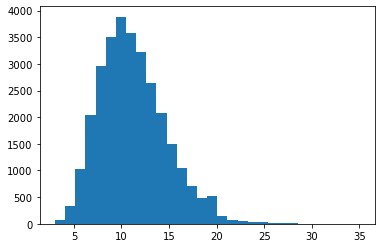

In [245]:
plt.hist(all_cap_len, bins = 30)

In [248]:
with open("./trained_data/word_to_index.pkl","wb") as wi:
    pickle.dump(word_to_index,wi)
with open("./trained_data/index_to_word.pkl","wb") as iw:
    pickle.dump(index_to_word,iw)


In [249]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [302]:
def data_generator(train_descriptions, encoding_train_images,index_to_word, num_of_images_perbatch,max_len = 35):
    X1,X2,y = [],[],[]
    n = 0
    while True:
        
        for key, val in train_descriptions.items():
            n+=1
            photo = encoding_train_images[key + ".jpg"]
            for v in val:
                st = [index_to_word[i] for i in v.split() if i in index_to_word]
                for i in range(1,len(st)):
                    in_seq = st[:i]
                    out_seq = st[i]
                    in_seq = pad_sequences([in_seq], max_len,padding="pre",value=0)[0]
                    out_seq = to_categorical([out_seq],num_classes=len_vocab)[0]
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)
                    
            if n == num_of_images_perbatch:
                yield [[np.array(X1),np.array(X2)],np.array(y)]
                X1,X2,y = [],[],[]
                n = 0

In [313]:
gen = data_generator(train_desc,encoding_train_images,index_to_word,1000)

In [314]:
x,y = next(gen)

In [315]:
x[0].shape

(49211, 2048)

In [316]:
x[1].shape

(49211, 35)

In [317]:
y.shape

(49211, 1848)

# Word Embedding

In [319]:
f = open("./GloVe/glove.6B.50d.txt", encoding='utf8')
embedding_index = {}

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float")
    
    embedding_index[word] = coefs
    
f.close()


def get_embedding_output():
    
    emb_dim = 50
    embedding_output = np.zeros((len_vocab,emb_dim))
    
    for word, idx in word_to_index.items():
        embedding_vector = embedding_index.get(word)
        
        if embedding_vector is not None:
            embedding_output[idx] = embedding_vector
            
    return embedding_output


embedding_output = get_embedding_output()

In [321]:
embedding_output.shape

(1848, 50)

# model

In [323]:
from keras.layers import *
from keras.models import Model
from keras.layers.merge import add

In [326]:
# image model
CNN1 = Input(shape = (2048,))
CNN2 = Dropout(0.5) (CNN1)
CNN3 = Dense(256,activation="relu") (CNN2)

# CAPTIONS MODEL
RNN1 = Input(shape=(35,))
RNN2 = Embedding(len_vocab,50,mask_zero=True) (RNN1)
RNN3 = Dropout(0.5) (RNN2)
RNN4 = LSTM(256) (RNN3)

#model
MLP1 = add([CNN3,RNN4])
MLP2 = Dense(256,activation="relu") (MLP1)
MLP3 = Dense(len_vocab,activation="softmax") (MLP2)

# merge model
model = Model(inputs = [CNN1,RNN1],outputs = MLP3)

In [327]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 50)       92400       input_6[0][0]                    
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 2048)         0           input_5[0][0]                    
____________________________________________________________________________________________

In [328]:
model.layers[2].set_weights([embedding_output])
model.layers[2].trainable  =False

In [329]:
model.compile(loss="categorical_crossentropy",optimizer = "adam")

In [330]:
epochs = 10
num_of_images_perbatch = 4
steps = len(train_desc)//num_of_images_perbatch

In [ ]:
for i in range(epochs):
    gen = data_generator(train_desc,encoding_train_images,index_to_word,num_of_images_perbatch)
    model.fit_generator(gen,steps,epochs=1,verbose=1)
    model.save("Image-Captioning_weights-{}.h5".format(str(i)))

Epoch 1/1
1500/1500 [==============================] - 389s 259ms/step - loss: 4.9056
Epoch 1/1
1500/1500 [==============================] - 527s 351ms/step - loss: 4.5524
Epoch 1/1
1500/1500 [==============================] - 527s 351ms/step - loss: 4.4319
Epoch 1/1
1500/1500 [==============================] - 529s 352ms/step - loss: 4.3529
Epoch 1/1
1500/1500 [==============================] - 342s 228ms/step - loss: 4.2933
Epoch 1/1
1500/1500 [==============================] - 224s 149ms/step - loss: 4.2413
Epoch 1/1
1500/1500 [==============================] - 234s 156ms/step - loss: 4.2026
Epoch 1/1
1105/1500 [=====================>........] - ETA: 1:17 - loss: 4.1748